# Exploratory Data Analysis: Part 2 - Analysis and Visualizations

In this second part of our [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) journey, we will build upon the cleaned up dataset that we created in part 1.

In part 2 we will use visualization libraries to look closer at individual columns and to see how different columns relate to one another.

## Part 1 Recap

### The Dataset: Chocolate Bar Ratings

You should remember that in this lab we are using a [chocolate bar ratings dataset](https://www.kaggle.com/rtatman/chocolate-bar-ratings) from the [Flavors of Cacao](http://flavorsofcacao.com/flavor.html) data. On the [Kaggle page for the dataset](https://www.kaggle.com/rtatman/chocolate-bar-ratings) we can find the documentation for the columns:

Column | Data Type | Description
-------|-----------|-------------
Company (Maker-if known) | String | Name of the company manufacturing the bar.
Specific Bean Origin or Bar Name | String | The specific geo-region of origin for the bar.
REF | Number | A value linked to when the review was entered in the database. Higher = more recent.
Review Date | Number | Date of publication of the review.
Cocoa Percent | String | Cocoa percentage (darkness) of the chocolate bar being reviewed.
Company Location | String | Manufacturer base country.
Rating | Number | Expert rating for the bar.
BeanType | String | The variety (breed) of bean used, if provided.
Broad Bean Origin | String | The broad geo-region of origin for the bean.

In part 1 of this unit we modified the columns to be:

Column | Data Type | Description
-------|-----------|------------
Company | String  | Name of the company manufacturing the bar.
Company Location | String | Manufacturer base country.
Bean Type | String | The variety (breed) of bean used, if provided.
Specific Bean Origin | String | The specific geo-region of origin for the bar.
Broad Bean Origin | String | The broad geo-region of origin for the bean.
Cocoa Percent | Number | Cocoa percentage (darkness) of the chocolate bar being reviewed.
REF | Number |A value linked to when the review was entered in the database. Higher = more recent.
Review Date | Number | Date of publication of the review.
Rating | Number | Expert rating for the bar. Number between 1.0 and 5.0, inclusive.
Grade | Number | Expert rating for the bar. 'A' - 'Q'. Maps to distinct ratings.

Let's download the dataset again and apply the changes that we made in part 1.

### Acquiring the Data

The data is hosted on Kaggle, so we can use our Kaggle credentials to download the data into the lab. The dataset is located at [https://www.kaggle.com/rtatman/chocolate-bar-ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings).

In [2]:
import urllib

urllib.request.urlretrieve(
    'https://query.data.world/s/4mas3bum4mywpet2okhclsvz5264c5',
    'Assets/chocolate-bar-ratings.zip')

We now have our data downloaded to our virtual machine and stored in the file `chocolate-bar-ratings.zip`.

### Prepping the `DataFrame`

We will now load the data into a `DataFrame` and apply the data preprocessing that was done in part 1 of this unit. Run the hidden code block below to fill a `DataFrame` called `df` with preprocessed data.

Run this block again if you need to reset the `df` `DataFrame`. After you run the code block, there will also be a function that you can use to reset `df`:

```python
  df = reload_data()
```

In [2]:
#@title Part 1 Code: Press Run To Load Preprocessed Data Frame

import pandas as pd

def reload_data():
  df = pd.read_csv('Assets/chocolate-bar-ratings.zip')

  df.columns = [
    'Company',
    'Specific Bean Origin',
    'REF',
    'Review Date',
    'Cocoa Percent',
    'Company Location',
    'Rating',
    'Bean Type',
    'Broad Bean Origin'
  ]

  df = df[[
    'Company',
    'Company Location',
    'Bean Type',
    'Specific Bean Origin',
    'Broad Bean Origin',
    'Cocoa Percent',
    'REF',
    'Review Date',
    'Rating',
  ]]

  column = 'Company'
  for broken, fixed in {
    'Shattel': 'Shattell',
    'Cacao de Origin': 'Cacao de Origen',
  }.items():
    df.loc[df[column] == broken, column] = fixed

  column = 'Company Location'
  for broken, fixed in {
    'Domincan Republic': 'Dominican Republic',
    'Niacragua': 'Nicaragua',
    'Eucador': 'Ecuador',
    'Amsterdam': 'Holland',
    'U.K.': 'England',
  }.items():
    df.loc[df[column] == broken, column] = fixed

  column = 'Bean Type'
  df.loc[df[column].isna(), column] = 'Unknown'
  df.loc[df[column] == chr(0xa0), column] = 'Unknown'

  column = 'Specific Bean Origin'
  for broken, fixed in {
    'Ambolikapkly P.': 'Ambolikapiky P.',
    'Dominican Republicm, rustic': 'Dominican Republic, rustic',
    'Nicaraqua': 'Nicaragua',
  }.items():
    df.loc[df[column] == broken, column] = fixed

  column = 'Broad Bean Origin'
  df.loc[(df['Specific Bean Origin'] == 'Madagascar') &
        (df[column].isna()), column] = 'Madagascar'
  df.loc[df[column] == chr(0xa0), column] = 'Unknown'

  column = 'Cocoa Percent'
  df[column] = df[column].apply(lambda s: float(s[:-1]))

  def grade(rating):
    letter_grade = 'A'
    numeric_rating = 5.0
    while rating < numeric_rating:
      letter_grade = chr(ord(letter_grade) + 1)
      numeric_rating -= 0.25
    return letter_grade

  column = 'Grade'
  df[column] = df['Rating'].apply(grade)
  
  return df

df = reload_data()
df.sample(10)

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating,Grade
1705,Vao Vao (Chocolaterie Robert),Madagascar,Trinitario,Madagascar,Madagascar,72.0,404,2009,2.75,J
1136,Minimal,Japan,"Criollo, Trinitario","Acul-du-Nord, 2015",Haiti,70.0,1920,2016,3.50,G
1262,Palette de Bine,Canada,Blend,Duo- Gran Couva & Camino Verde,"Trinidad, Ecuador",75.0,1399,2014,3.50,G
1724,Violet Sky,U.S.A.,Trinitario,Sambirano Valley,Madagascar,77.0,1458,2015,2.75,J
1277,Patric,U.S.A.,Unknown,"Piura, Choc. Garage Exclusive",Peru,67.0,1034,2013,4.00,E
1176,Neuhaus (Callebaut),Belgium,Forastero,West Africa,West Africa,73.0,15,2006,2.00,M
272,Britarev,Russia,Unknown,Ecuador,Ecuador,70.0,1638,2015,3.25,H
827,Hotel Chocolat,England,Trinitario,"Marcial, single Cote, 2012",St. Lucia,70.0,1030,2013,4.00,E
1417,Salgado,Argentina,Forastero,Bahia Superior,Brazil,70.0,288,2008,3.50,G
742,Grenada Chocolate Co.,Grenada,Trinitario,Grenada,Grenada,60.0,363,2009,2.75,J


## Data Analysis

We have looked at each column in isolation in order to ensure that the data in that column is complete and seems to make sense. In this section we will take that newly-cleaned data and look at it in a little more depth. We will examine some columns individually. We'll also see how columns might relate to one another.

### Visualizing Ratings

Ratings are very important to our dataset. One interesting visualization might be a line chart of counts of each rating. To do that we can extract a `Series` containing the ratings, group by that `Series`, and plot the counts.

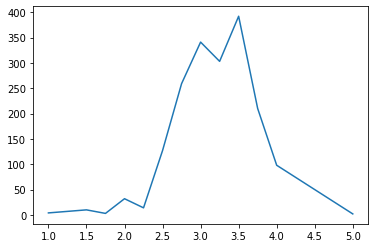

In [3]:
import matplotlib.pyplot as plt

ratings = df['Rating'].groupby(df['Rating']).count()

plt.plot(ratings.index, ratings)
plt.show()

This shows that ratings seem to mostly be in the 3s with a reasonable tail higher and lower.

We can also put these values in a bar chart

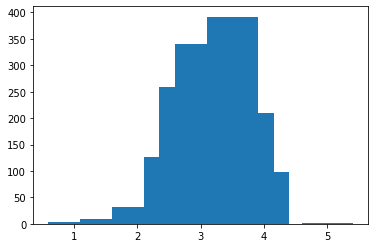

In [4]:
import matplotlib.pyplot as plt

grades = df['Rating'].groupby(df['Rating']).count()

plt.bar(grades.index, grades)
plt.show()

This changes the visualization's form quite a bit. Instead of using 'Rating' for the chart, let's use our 'Grade' column.

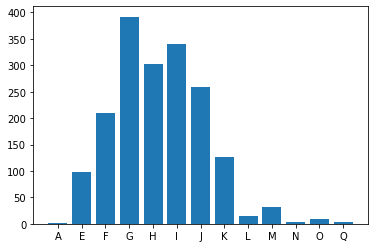

In [5]:
import matplotlib.pyplot as plt

grades = df['Grade'].groupby(df['Grade']).count()

plt.bar(grades.index, grades)
plt.show()

Overall, that's looking better. The sorting is opposite of 'Rating', so our best chocolates are to the left instead of the right. And you can see that we are missing 'B', 'C' and other values, which is not ideal.

#### Exercise 1: Grade Bar Chart

Improve on the bar chart of Grade values by having the chart include all letter grades, with counts or not, between 'A' and 'Q'.

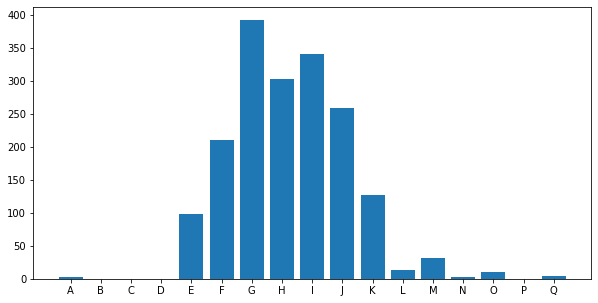

In [6]:
df = reload_data()

# Your Solution Goes Here
## Data
grade_count = df.Grade.value_counts()
missing = [(x, 0) for x in 'ABCDEFGHIJKLMNOPQ' if x not in grade_count.index]
grade_count = list(sorted(list(grade_count.items()) + missing, key = lambda x : x[0]))
## Figure
plt.figure(figsize = (10, 5))
plt.bar([x[0] for x in grade_count], [x[1] for x in grade_count])
plt.show()

---

### Visualizing Cocoa Percentage

Cocoa percentage is another value that might be interesting in our data analysis. For instance, does a higher or lower cocoa percentage seem to correlate with the rating in any manner?

We'll get to questions like this, but first let's just create a simple plot.

First let's see if 'Cocoa Percent' is an actual continuous variable.

In [7]:
sorted(df['Cocoa Percent'].unique())

[42.0,
 46.0,
 50.0,
 53.0,
 55.0,
 56.0,
 57.0,
 58.0,
 60.0,
 60.5,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 72.5,
 73.0,
 73.5,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 99.0,
 100.0]

This does seem much more like a continuous variable than 'Rating' did. In this case we will want to use some sort of continuous plot.

For this particular visualization, we will pull out a new tool, the [`seaborn.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html). This plot combines a line chart of kernel density and a histogram to show the distribution of values in the `Series`.

c:\users\wahyu setianto\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


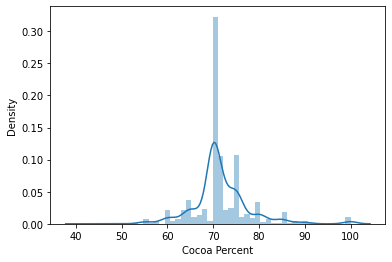

In [8]:
import seaborn as sns

_ = sns.distplot(df['Cocoa Percent'])

As we can tell from this plot, a very large proportion of chocolate bars rated have around 70% cocoa. We may want to ask whether this sample is representative of chocolate bars on the market in general or whether reviewers favor such bars because they expect them to be more enjoyable. (i.e. Is our sample representative of the population?) This, of course, would require research outside of our data set.

#### Exercise 2: What Is a Distplot?

We plotted a "distplot" above but didn't get too specific on what was actually being shown. The values on the x-axis make sense; they are the percentage of cocoa used in the bar. But there are some other aspects of the chart that are a little less clear at first.

Using the [`seaborn.distplot` documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) and other resources, answer the following questions:

**Student Solution**

1. What do the columns on the chart represent?
> *Bins*
1. What does the continuous line on the chart represent?
> *The Distribution of the Data*
1. What is the y-value of the `sns.distplot`?
> *Desnsity*



---

### Visualizing Ratings by Bean Type

Sometimes it is useful to visualize our target, in this case, 'Rating', by different features. One way to do this with a continuous variable like 'Rating' is with a box plot.

Box plots (a.k.a., box and whisker plots) show the distribution across categories. These plots are quite informative, as they display a five-statistic summary of a dataset, including:

1. Minimum
1. First quartile (about 25% of the numbers in the dataset lie below it)
1. Median (splits the dataset in half)
1. Third quartile (about 75% of the numbers in the dataset lie below it)
1. Maximum

In the example below, we create our box plot using [`seaborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html). We pass the function our `DataFrame`, the y-value which determines the number of box plots, and the x-value which is what the statistics are gathered from.

Remember that `seaborn` is based on `matplotlib`, so we can still use features of `matplotlib` like the figure size to increase the size of `seaborn` charts.

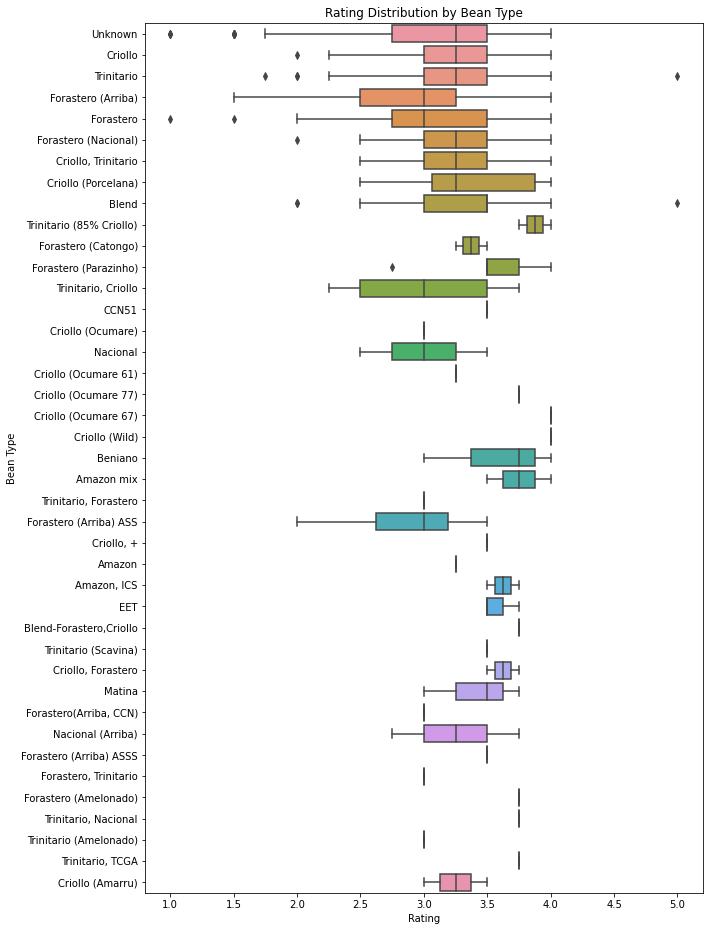

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = reload_data()

plt.figure(figsize=[10, 16])
ax = sns.boxplot(
    data=df,
    y='Bean Type',
    x='Rating',
)
_ = ax.set_title('Rating Distribution by Bean Type')

This is a nice chart, but it is difficult to get a snapshot view of the data. Sometimes sorting is important.

As an example, let's look at a chart that is sorted alphabetically.

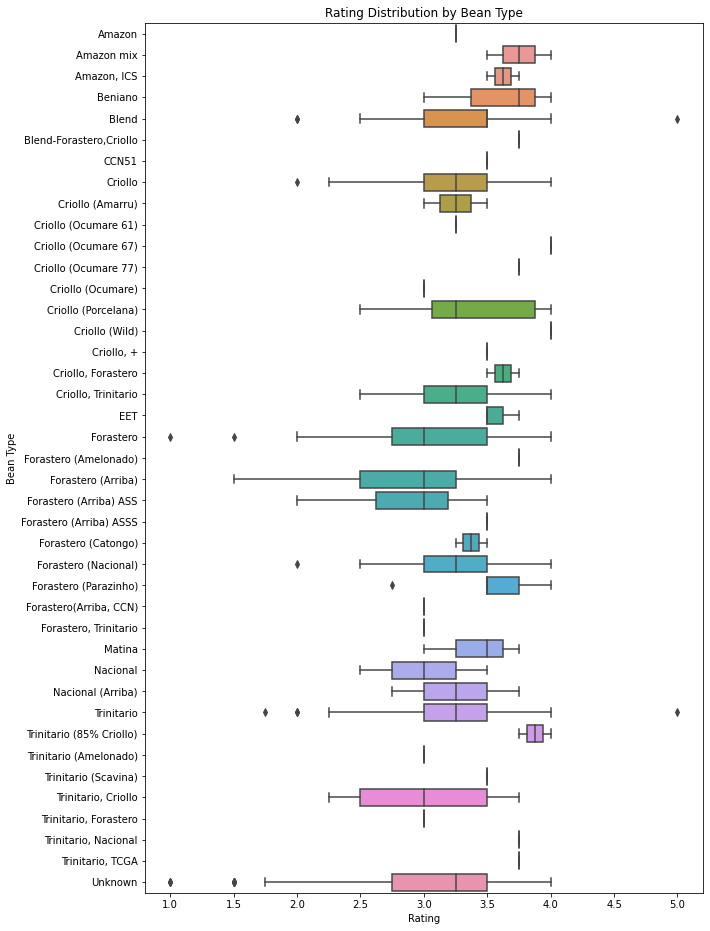

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = reload_data()

plt.figure(figsize=[10, 16])

ax = sns.boxplot(
    data=df,
    y='Bean Type',
    x='Rating',
    order=sorted(df['Bean Type'].unique()),
)

_ = ax.set_title('Rating Distribution by Bean Type')

That might be even worse!

What sort order might give some meaning to this chart?

#### Exercise 3: Building Boxplots

Boxplots are useful, but without curated sorting, the message can get lost in the noise. Experiment with different sorting strategies for the boxplot and make an argument for why you find value in your plot.

Below is an example of plots sorted by the mean rating. Look at it and see why sorting by mean might bring value.

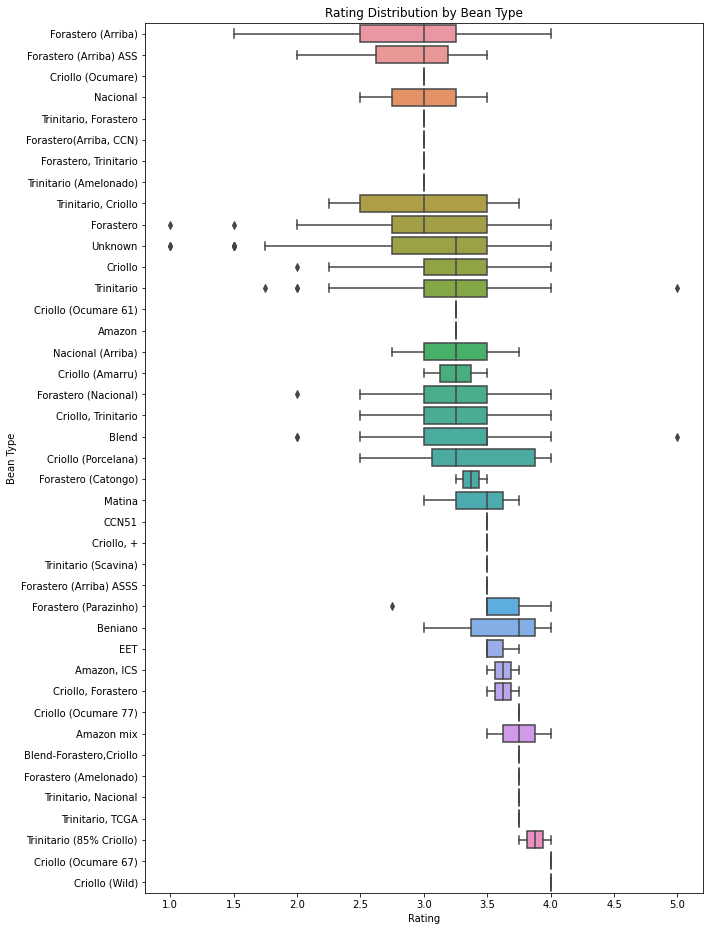

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = reload_data()

plt.figure(figsize=[10, 16])

ax = sns.boxplot(
    data=df,
    y='Bean Type',
    x='Rating',
    order=sorted(df['Bean Type'].unique(), 
                 key=lambda bt: df[df['Bean Type'] == bt]['Rating'].mean()),
)

_ = ax.set_title('Rating Distribution by Bean Type')

Some thoughts:

* Even sorting by mean, the max ratings can still be held by beans near the median.
* Beans with a low median rating are actually widespread on ratings.
* Quality tightens with beans with higher median rankings.

These observations may lead us to ask: what are the sample sizes? Are the top-median beans just single samples while more popular beans are weighted down by large sample sizes? Regardless of which sorting criteria we use, we should take a closer look at our bean types. Some of the types with fewer samples might need to be rolled into a larger grouping.

For this exercise, try different statistics for sorting. Find one that you can interpret and explain why the specific sorting is meaningful.

**Student Solution**

In [0]:
# Your Solution Goes Here

---

### Visualizing Ratings by Cocoa Percent

Let's take a moment to also look at the spread of ratings by 'Cocoa Percent'. A natural way to do this might be a scatter plot.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = reload_data()

plt.figure(figsize=[10, 10])
ax = sns.scatterplot(
    data=df,
    x='Cocoa Percent',
    y='Rating',
)

_ = ax.set_title('Ratings by Cocoa Percent')

This is a somewhat unfulfilling scatter plot. Since ratings aren't really continuous, we see "lines" of dots for the ratings tranches. There are also some lines formed vertically; though 'Cocoa Percent' is continuous, some percentages are more common than others.

Maybe a boxplot would work?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = reload_data()

plt.figure(figsize=[10, 10])
ax = sns.boxplot(
    data=df,
    x='Cocoa Percent',
    y='Rating',
)

_ = ax.set_title('Ratings by Cocoa Percent')

That is better. Given this box plot, we can see some trends in the data. However, there are enough different 'Cocoa Percent' values to make this chart a little cluttered.

We can clean it up a bit by **binning** the 'Cocoa Percent' values.

Binning is the process of taking a large set of continuous values and dividing them into a fixed number of bins where each bin contains a range of values. Each bin typically has the same sized range.

To bin data we can use [`NumPy.histogram_bin_edges`](https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html) to find the edges of our bins.

In [0]:
import pandas as pd
import numpy as np

df = reload_data()

edges = np.histogram_bin_edges(df['Cocoa Percent'])

for i in range(len(edges) - 1):
  print(f'{edges[i]:.{1}f} - {edges[i+1]:.{1}f} ({edges[i+1]-edges[i]:.{1}f})')

In the code above we asked `histogram_bin_edges()` to find the edges of our bins for 'Cocoa Percent'. We then printed the edges for each bin and the size of the range for each bin. You can see that each is 5.8.

Given these bin edges, we can now use another handy `NumPy` function: `digitize`.  `digitize` will examine our 'Cocoa Percent' values and return the bin that each value belongs in.

In [0]:
import pandas as pd
import numpy as np

df = reload_data()

edges = np.histogram_bin_edges(df['Cocoa Percent'])
bins = np.digitize(df['Cocoa Percent'], edges)
np.unique(bins)

Wait, there are 11 bins when there were only supposed to be 10. What happened?

It turns out that `histogram_bin_edges` and `digitize` think differently about the list of edges. `histogram_bin_edges` returns `bin_count + 1` values (in this case, 11), so that each bin has a defined stop and start. The final edge serves as an upper limit (in this case, 100).

On the other hand, `digitize` lets the final bin accept any data larger than the start of the bin (or smaller if you are creating decreasing order bins), so there's no need for an edge to define the outside boundary. For that reason, we have to not pass digitize the final edge.

In [0]:
import pandas as pd
import numpy as np

df = reload_data()

edges = np.histogram_bin_edges(df['Cocoa Percent'])
bins = np.digitize(df['Cocoa Percent'], edges[:-1])
np.unique(bins)

That is better. We can now bring it all together and create a binned boxplot.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = reload_data()

edges = np.histogram_bin_edges(df['Cocoa Percent'], bins=10)
bins = np.digitize(df['Cocoa Percent'], edges[:-1])

plt.figure(figsize=[16, 10])

ax = sns.boxplot(
    x=bins,
    y=df['Rating'],
)

labels = [f'{edges[i]:.{1}f} - {edges[i+1]:.{1}f}'
            for i in range(len(edges) - 1)]
_ = plt.xticks(list(range(10)), labels)
_ = ax.set_title('Ratings by Cocoa Percent')

#### Exercise 4: Interpreting Box Plots

We've now created a boxplot that shows the range of ratings for different bins of percentages of cocoa. Use the plot to answer the following questions.

**Student Solution**

1. Which bin of cocoa percentages tends to be the lowest rated?
> *Your Answer Goes Here*
1. Which bin (or bins) of cocoa percentages tend to get the most consistent ratings?
> *Your Answer Goes Here*

---

### Finding Correlations

Another important check is to see if there are any correlations in your dataset. Correlation is a measure of how well two continuous variables track together.

Pandas provides `DataFrame.corr()`, which provides a correlation matrix for all of the numeric values in the `DataFrame`.

In [0]:
df = reload_data()

df.corr()

#### Exercise 5: Heatmap Correlations

It is common for correlations to be shown in a heatmap. In this exercise we will create a heatmap and then attempt to interpret the map.

**Student Solution**

Uses `seaborn` or `matplotlib` to create a heatmap representing the correlations in `df`.

In [0]:
# Your Solution Goes Here

1. Which columns have the strongest correlation?
> *Your answer goes here.*
1. Why do you think they have such a strong correlation?
> *Your answer goes here.*

---

### Visualizing Ratings Across the Globe

This dataset seems to really emphasize the source of the cocoa beans used to make a chocolate bar. It would be interesting to see if there was a correlation with the geographical source of the beans and the perceived quality of the resulting chocolate.

In order to do this, we need to take one of our columns of location data and turn it into geographical coordinates that we can then use to attempt to identify a pattern.

The alleged geographical columns that we have in our data are:

Column | Data Type | Description
-------|-----------|------------
Company Location | String | Manufacturer base country.
Specific Bean Origin | String | The specific geo-region of origin for the bar.
Broad Bean Origin | String | The broad geo-region of origin for the bean.

But we know from our earlier analysis of the data that both of the bean origin columns are pretty messy. We could possibly tie most of the data points down to a geographical location, but it would be a huge undertaking. Also, the bean origins can have multiple locations for mixed blends. Ultimately this would be an interesting undertaking, but not for the scope of this course. 

'Company Location' offers more promise though. We have verified that it contains country information. It doesn't necessarily relate to the source of the bean, but we can at least try to see where the best bars are created!

Since the 'Company Location' values are all countries, we went ahead and created a `DataFrame` below that contains the latitude and longitude values for the countries that we have company data for. We have also merged the lat/long data into `df`.

Run the hidden code cell below to update `df` with latitude and longitude data. After you run this cell a function called `reload_data_plus_latlong()` will be available to you to restore `df` to its original state at any time. To use it in your code write:

```python
df = reload_data_plus_latlong()
```

In [0]:
#@title Lat Long Addition: Press Run To Load `df`

def reload_data_plus_latlong():
  df = reload_data()

  country_df = pd.DataFrame([
    ['Argentina', -36.3, -60.0],
    ['Australia', -35.15, 149.08],
    ['Austria', 48.12, 16.22],
    ['Belgium', 50.51, 4.21],
    ['Bolivia', -16.2, -68.1],
    ['Brazil', -15.47, -47.55],
    ['Canada', 45.27, -75.42],
    ['Chile', -33.24, -70.4],
    ['Colombia', 4.34, -74.0],
    ['Costa Rica', 9.55, -84.02],
    ['Czech Republic', 50.05, 14.22],
    ['Denmark', 55.41, 12.34],
    ['Dominican Republic', 18.74, -70.16],
    ['Ecuador', -0.15, -78.35],
    ['England', 52.36, -1.17],
    ['Fiji', -18.06, 178.3],
    ['Finland', 60.15, 25.03],
    ['France', 48.5, 2.2],
    ['Germany', 52.3, 13.25],
    ['Ghana', 5.35, -0.06],
    ['Grenada', 12.12, -61.68],
    ['Guatemala', 14.4, -90.22],
    ['Holland', 52.13, 5.29],
    ['Honduras', 14.05, -87.14],
    ['Hungary', 47.29, 19.05],
    ['Iceland', 64.1, -21.57],
    ['India', 28.37, 77.13],
    ['Ireland', 53.21, -6.15],
    ['Israel', 31.71, -35.1],
    ['Italy', 41.54, 12.29],
    ['Japan', 36.2, 138.25],
    ['Lithuania', 54.38, 25.19],
    ['Madagascar', -18.55, 47.31],
    ['Martinique', 14.36, -61.02],
    ['Mexico', 19.2, -99.1],
    ['Netherlands', 52.23, 4.54],
    ['New Zealand', -41.19, 174.46],
    ['Nicaragua', 12.06, -86.2],
    ['Peru', -12.0, -77.0],
    ['Philippines', 14.4, 121.03],
    ['Poland', 52.13, 21.0],
    ['Portugal', 38.42, -9.1],
    ['Puerto Rico', 18.28, -66.07],
    ['Russia', 61.52, 105.32],
    ['Sao Tome', 0.19, 6.61],
    ['Scotland', 56.49, 4.2],
    ['Singapore', 1.35, 103.82],
    ['South Africa', -25.44, 28.12],
    ['South Korea', 35.91, 127.77],
    ['Spain', 40.25, -3.45],
    ['St. Lucia', 13.91, -60.98],
    ['Suriname', 5.5, -55.1],
    ['Sweden', 59.2, 18.03],
    ['Switzerland', 46.57, 7.28],
    ['U.S.A.', 39.91, -77.02],
    ['Venezuela', 10.3, -66.55],
    ['Vietnam', 14.06, 108.28],
    ['Wales', 52.13, -3.78],
  ], columns=['Country', 'Latitude', 'Longitude'])

  df = pd.merge(df, country_df, left_on='Company Location', right_on='Country')
  return df

df = reload_data_plus_latlong()
df.sample(10)

Given this new geographical data, we can now scatter plot the mean ratings data for each country onto the country's latitude and longitude.

In [0]:
import seaborn as sns

df = reload_data_plus_latlong()

mean_ratings_df = df.groupby(['Latitude', 'Longitude'],
                             as_index=False).mean()
mean_ratings_df = mean_ratings_df[['Latitude', 'Longitude', 'Rating']]

_ = sns.scatterplot(x='Longitude', y='Latitude', data=mean_ratings_df)

#### Exercise 6: More Meaningful Scatter Plots

We just added in geographical data in order to scatter plot our ratings onto a "map", but the plot isn't very meaningful. From the plots we can somewhat make out Europe and South America, but we don't really know if they produce high-quality chocolates.

In this exercise you will add visual cues to the scatter plot to indicate the relative quality of chocolate produced by each country. Check out the [`seaborn.scatterplot()` documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and find arguments that you can pass to `seaborn.scatterplot()` that will call out the good chocolate from the bad by changing the size and color of the dots on the plot.

**Student Solution**

In [0]:
# Your Solution Goes Here

---

### Finding Facts About the Data

We've created some nice visualizations to explore our data. Sometimes, you might just want textual information. In this section we'll use `Pandas` to answer a few questions about our dataset.

We might want to find the companies with the highest average ratings. To do this we can group our data by 'Company', find the mean rating, and print out only the top rated companies. We'll do this just using `Pandas`.

In [0]:
df.groupby('Company')[['Rating']].mean().sort_values(by='Rating').tail(10)

We can use grouping and index selection to answer questions like: *How many companies produce, on average, worse than the overall mean rated chocolates?*

In [0]:
# Find the overall mean rating
mean_rating = df['Rating'].mean()

# Find each company's mean rating
mean_ratings_by_company = df.groupby('Company',
                                     as_index=False)[['Rating']].mean()

# See how many of those ratings are below the mean
mean_ratings_by_company[mean_ratings_by_company['Rating'] < mean_rating]['Company'].count()

#### Exercise 7: Highest Rated Companies With Many Reviews

Earlier we found the companies with the highest mean rating, but some of those companies only have one or two reviews. For this exercise find five highest-mean rated companies with at least five reviews.

**Student Solution**

In [0]:
# Your Code Goes Here

---

## Conclusion

Congratulations. You have now taken a dataset with missing and messy values, cleaned it up, and examined the data through visualization and through Pandas queries.

This exploratory data analysis and data preprocessing is a very important step in data science and machine learning. Knowing how to use machine learning models is important, but if you want to model data properly, it is just as important that you understand your data well.